In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for visualization
import matplotlib

In [2]:
data_df = pd.read_csv('Churn.csv')

## Overview of Churn Data

In [3]:
print(f'Number of rows: {data_df.shape[0]}')
print(f'Number of columns: {data_df.shape[1]}')
print(f'\nFeatures :\n{data_df.columns.to_list()}')
print(f'\nMissing data:\n{data_df.isnull().sum()}')

Number of rows: 7043
Number of columns: 21

Features :
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing data:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### The Data falls under two categories:

17 Categorical features:

**CustomerID**: Customer ID unique for each customer<br>
**gender**: Whether the customer is a male or a female<br>
**SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)<br>
**Partner**: Whether the customer has a partner or not (Yes, No)<br>
**Dependent**: Whether the customer has dependents or not (Yes, No)<br>
**PhoneService**: Whether the customer has a phone service or not (Yes, No)<br>
**MultipeLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)<br>
**InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)<br>
**OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)<br>
**OnlineBackup**: Whether the customer has an online backup or not (Yes, No, No internet service)<br>
**DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)<br>
**TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)<br>
**StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)<br>
**StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)<br>
**Contract**: The contract term of the customer (Month-to-month, One year, Two years)<br>
**PaperlessBilling**: The contract term of the customer (Month-to-month, One year, Two years)<br>
**PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)<br>

**Churn**: Whether the customer churned or not (Yes or No)

3 Numerical features:

**Tenure**: Number of months the customer has stayed with the company<br>
**MonthlyCharges**: The amount charged to the customer monthly<br>
**TotalCharges**: The total amount charged to the customer<br>

---

These features can also be sub-divided into:

* Demographic customer information
    * gender , SeniorCitizen , Partner , Dependents<br>


* Services that each customer has signed up for
    * PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies<br>


* Customer account information
    * tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges<br>


##  Overall Churn 

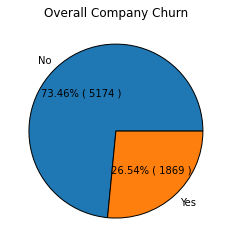

In [4]:
gb_df = data_df.groupby('Churn').size().to_frame().reset_index()
gb_df.rename(columns={0:'Count'},inplace =True)

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100
plt.pie(gb_df['Count'],labels = gb_df['Churn'],wedgeprops = {'edgecolor':'black'},
        autopct=lambda p:f'{p:.2f}% ( {p*(gb_df.Count.sum())/100:.0f} )')

plt.title('Overall Company Churn')
plt.show()

### Overall Churn in the last Month
Yes: 26.54% <br>
No : 73.46%

---

## Exploring Categorical Features 

In [5]:
#Define Bar Chart Function
def bar(feature, df = data_df):
    gb_df = df.groupby([feature,'Churn']).size()
    gb_df = gb_df.unstack()
    gb_df.index.name = None    
    
    size = df[feature].count()
    str = f'{df[feature].value_counts().index.to_list()}'
    pcr = f'{round(df[feature].value_counts()/size*100,2).to_list()}'
            
    gb_df.plot(kind = 'bar',ylabel= 'Count', title = f'Churn by {feature}')
    plt.show()
    print(f'Percentage values of {str} are {pcr} respectively.')


### Churn based on Demography

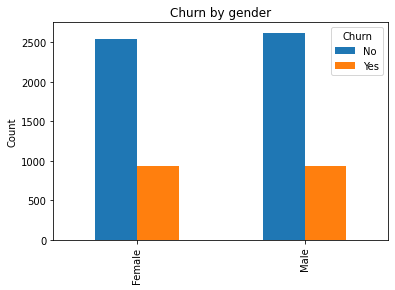

Percentage values of ['Male', 'Female'] are [50.48, 49.52] respectively.


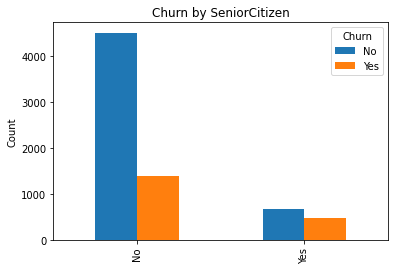

Percentage values of ['No', 'Yes'] are [83.79, 16.21] respectively.


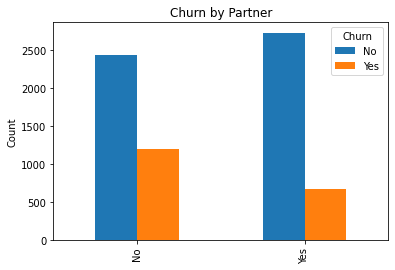

Percentage values of ['No', 'Yes'] are [51.7, 48.3] respectively.


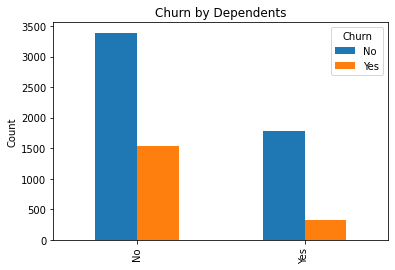

Percentage values of ['No', 'Yes'] are [70.04, 29.96] respectively.


In [6]:
#Gender feature Plots
bar('gender')
#Senior Citizen feature Plots
data_df.loc[data_df['SeniorCitizen']==0,'SeniorCitizen'] = 'No'
data_df.loc[data_df['SeniorCitizen']==1,'SeniorCitizen'] = 'Yes'
bar('SeniorCitizen')
#Partner feature Plots
bar('Partner')
#Dependent feature Plots
bar('Dependents')


**Demographic analysis Insight**: Gender and partner are even distributed with approximate percentage values. The difference in churn is slightly higher in females but the diffreence is negligible. There is a higher proportion of churn amongst younger customers (where SeniorCitizen is No), customers with no partners and customers with no dependents. These analysis on demographic section of data highlights on-senior citizens with no partners and dependents describe a particular segment of customers that are likely to churn.

---
---

### Churn Based On Subscribed Services

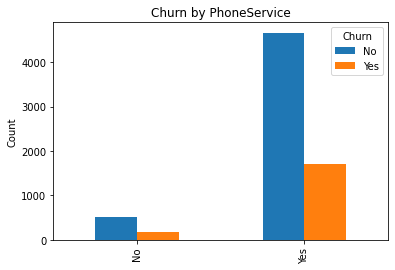

Percentage values of ['Yes', 'No'] are [90.32, 9.68] respectively.


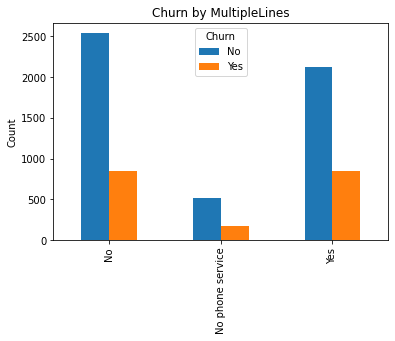

Percentage values of ['No', 'Yes', 'No phone service'] are [48.13, 42.18, 9.68] respectively.


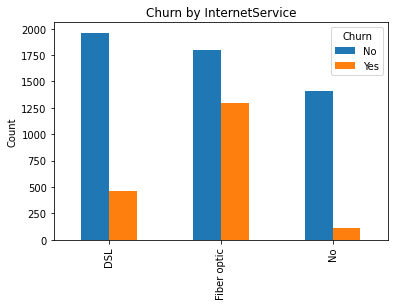

Percentage values of ['Fiber optic', 'DSL', 'No'] are [43.96, 34.37, 21.67] respectively.


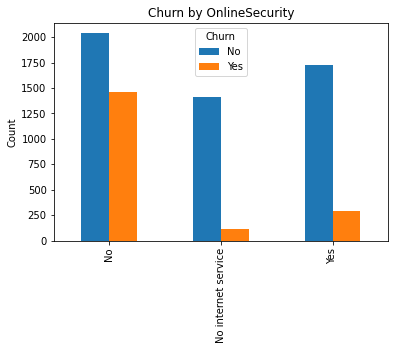

Percentage values of ['No', 'Yes', 'No internet service'] are [49.67, 28.67, 21.67] respectively.


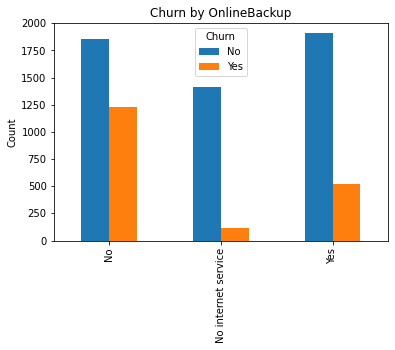

Percentage values of ['No', 'Yes', 'No internet service'] are [43.84, 34.49, 21.67] respectively.


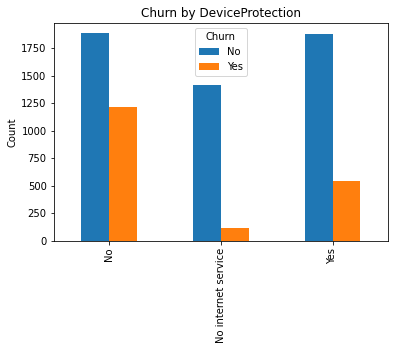

Percentage values of ['No', 'Yes', 'No internet service'] are [43.94, 34.39, 21.67] respectively.


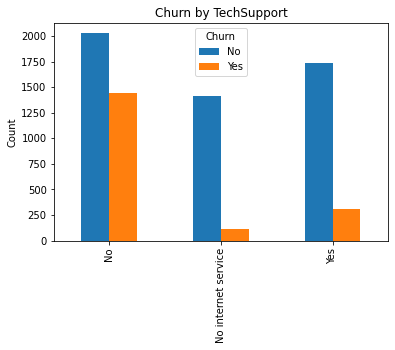

Percentage values of ['No', 'Yes', 'No internet service'] are [49.31, 29.02, 21.67] respectively.


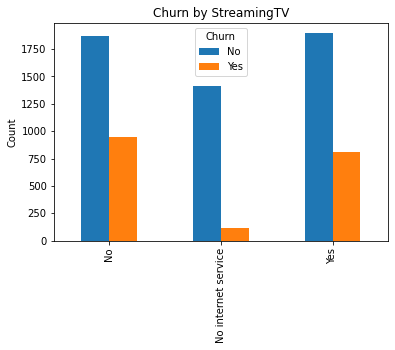

Percentage values of ['No', 'Yes', 'No internet service'] are [39.9, 38.44, 21.67] respectively.


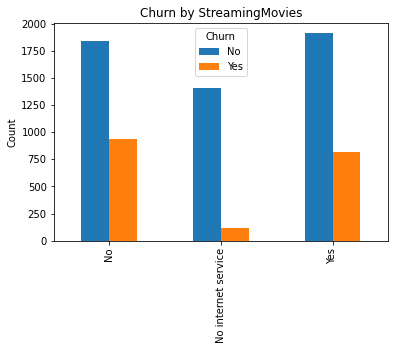

Percentage values of ['No', 'Yes', 'No internet service'] are [39.54, 38.79, 21.67] respectively.


In [7]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

**Analysis based on Services Signed-Up for**: These category of features shows significant variations across their values. If a customer does not have a phone service, he/she cannot have multiple lines. About 90.3% of the customers have phone services and have the higher rate to churn. Customers who have Fibre optic as internet service are more likely to churn, this can happen due to high prices, competition, customer service, and many other reasons. Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn. Customers with OnlineSecurity ,OnlineBackup ,DeviceProtection and TechSupport are more unlikely to churn. Streaming service is not predictive for churn as it evenly distributed to yes and no options.

---
---

### Churn Based On Payment Method

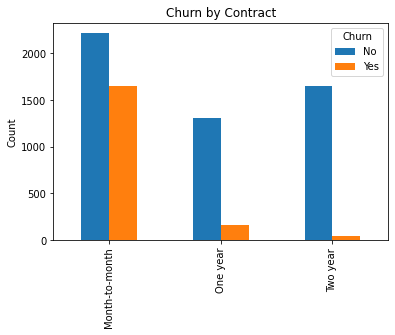

Percentage values of ['Month-to-month', 'Two year', 'One year'] are [55.02, 24.07, 20.91] respectively.


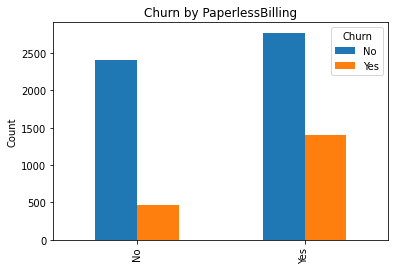

Percentage values of ['Yes', 'No'] are [59.22, 40.78] respectively.


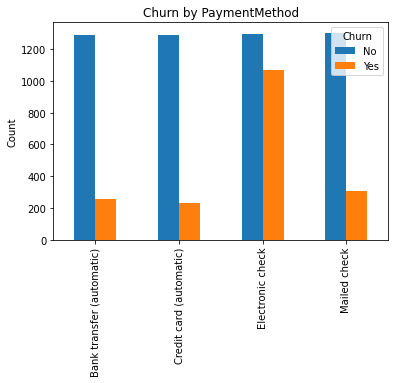

Percentage values of ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'] are [33.58, 22.89, 21.92, 21.61] respectively.


In [8]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

**Analysis based Payment:** The shorter the contract the higher churn rate as those with longer plans face additional barriers when cancelling prematurely. This clearly explains the motivation for companies to have long-term relationship with their customers. Churn Rate is higher for the customers who opted for paperless billing, About 59.2% of the customers make paperless billing. Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types.

---
---


### Explore Numerical Features

In [9]:
data_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
try:
    data_df['TotalCharges'] = data_df['TotalCharges'].astype(float)
except ValueError as ve:
    print(ve)

could not convert string to float: ''


In [11]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'],errors = 'coerce')
data_df['TotalCharges'] = data_df['TotalCharges'].fillna(data_df['TotalCharges'].median())

In [12]:
def hist(feature, df = data_df):

    filt= df['Churn'] == 'No'
    plt.hist([df.loc[filt,feature],df.loc[~filt,feature]],bins = 10,edgecolor='black',label=['No','Yes'])
    
    plt.title(f'Churn by {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    
    plt.legend()
    plt.show()


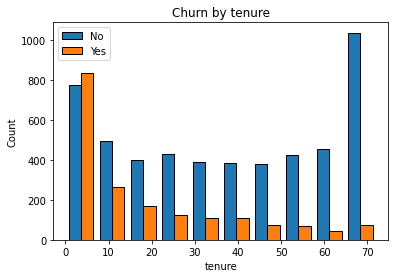

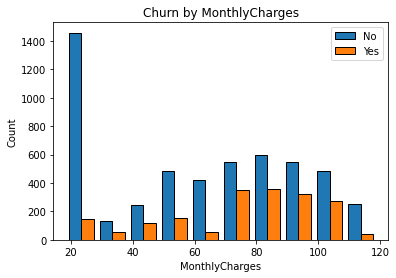

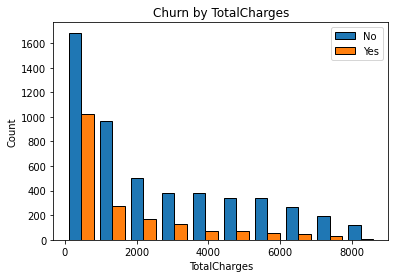

In [13]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

**Analysis based on Customer account information**: The tenure histogram is rightly skewed and shows that majority of customers has been with the telecom company for just the first few months (0-9 months) and the highest rate of churn is also in that first few months (0-9months). 75% of customers who end up leaving Telcom company do so within their first 30 months. The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate (This suggests that discounts and promotions can be an enticing reason for customers to stay). The total charge trend is quite depict due to variation in frequency. Lets bin the numeric features into 3 sections based on quantiles (low, medium and high to get more information from it).

